<a href="https://colab.research.google.com/github/lilynovelya/PCVK_24-25/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum Modul 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


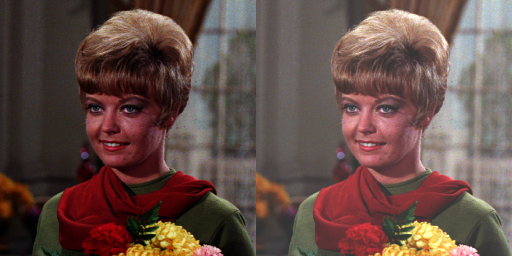

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
#for y in range(original.shape[0]):
#  for x in range(original.shape[1]):
#    for c in range(original.shape[2]):
#      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simpel tanpa for loop
brightness_image = cv.convertScaleAbs(original, beta= brightness, alpha=1)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Tugas Modul 3

 Implementasi Inverse Citra
---------------------------


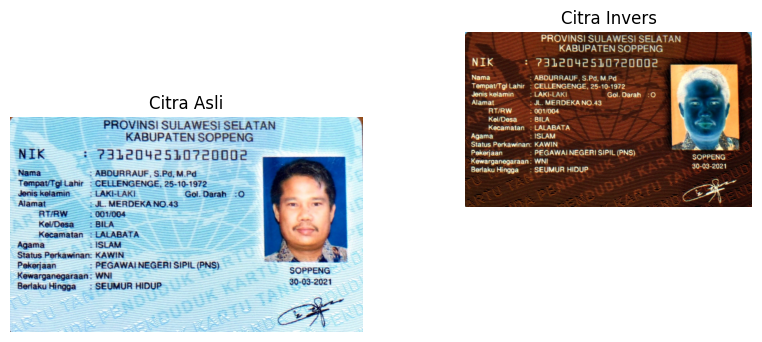

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' Implementasi Inverse Citra')
print('---------------------------')

image_path = ('/content/drive/MyDrive/PCVK/Images/KTP.jpg')
image = cv2.imread(image_path)

#Menghitung invers citra
inverted_image = 255 - image

#Citra asli dan invers
plt.figure(figsize=(10,5)) ##memberi nilai lebar 10, dan tinggi 5
plt.subplot(1, 2, 1)       ##membuat grid subplot dengan 1 baris dan 2 kolom, fokus ke 1
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  ##menampilkan citra asli subplot pertama, dan konversi warna BGR ke RGB dengan cv2.color
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Citra Invers')
plt.imshow(cv2.cvtColor(inverted_image, cv2.COLOR_BGR2RGB))  ##menampilkan citra yg diubah, stlh mengkonversi warna BGR ke RGB
plt.axis('off') ##menghilangkan sumbu y,x

plt.show()  ##menampilkan figur dengan 2 subplot bersampingan dan citra yg sesuai

 Mengubah kontras dan tingkat kecerahan citra
---------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


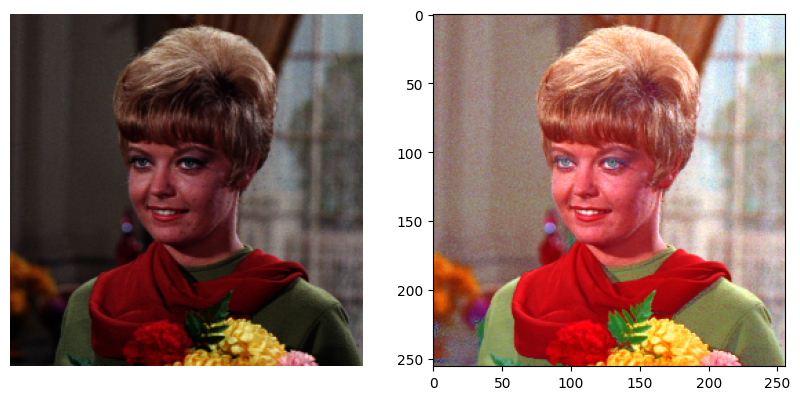

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah kontras dan tingkat kecerahan citra')
print('---------------------------------------------')

#Tingkat Kecerahan
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))  ##mengambil input dr pengguna dan mengubah ke int untuk mewakili tingkat kecerahan
except ValueError:
  print('Error, not a number')

#Kontras
try:
  kontras = int(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

image_path = ('/content/drive/MyDrive/PCVK/Images/female.tiff')
image = cv2.imread(image_path)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)

#Menghitung Brightness
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  ##citra awal BGR dikonversi mnjd HSV
hsv[:, :, 2] = cv2.add(hsv[:, :, 2], brightness * kontras)  ##untuk mengubah tingkat kecerahan dlm format HSV
gambar_hasil = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)  ##setelah mengubah tingkat kecerahan dgn HSV, dikembalikan lagi ke BGR agar mndpt citra yg baik

#Kontras
plt.imshow(cv2.cvtColor(gambar_hasil, cv2.COLOR_BGR2RGB))  ##mengambil gambar hasil dr subplot yg sesuai, mengubah BGR ke RGB menggunakan cv2.cvtColor
plt.axis('on') ##menghilangkan sumbu y,x

plt.show()


 Mengubah tingkat kecerahan citra
 --------------------------------
Masukkan nilai kecerahan :50


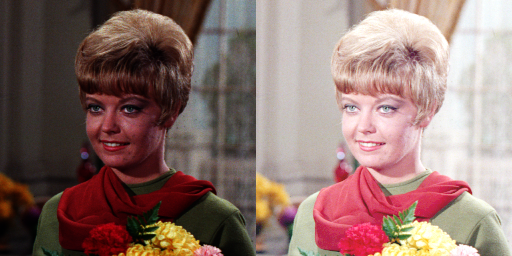

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
print(' Mengubah tingkat kecerahan citra')
print(' --------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan :'))
except ValueError:
  print('error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1 + original[y,x,c])), 0 , 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)